In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.70316357710246 94.35756168035277
16.60059562378018 109.74915191451191
71.92588823392455 -2.6985254281004813
-73.94811383541497 74.0858289338853
-27.837530844681567 43.24175796415756
39.544764353746075 68.60155750848787
67.94934341218766 -138.26573252949268
-0.5389626610460283 33.59322650883814
-2.389680773906207 85.77756130108816
-32.77294243533348 64.42349526707778
51.14787083194065 114.71479437017098
-42.76560244065609 -96.86010218775439
-50.240953563117365 -128.4539249056317
72.97459306443412 -163.1402645401447
-43.555593880098286 -149.74780612995994
-39.45952700136642 -16.053965660797644
40.48678581288877 -99.37048926188996
28.666796547648445 101.17304453604197
27.70076606988144 -57.68001602604326
-55.7975637942965 -138.99449696633954
-10.302239454660878 168.76665002769585
31.102790090182893 -46.24546792623448
73.08794300008904 83.49766182782378
53.89337827888687 161.26071451949684
-65.55789615138582 16.497999968231056
26.952290172369615 -24.989849704113396
52.00092995709565 39.

74.94885769831828 -29.974155648191612
51.517478579807374 72.4498737572682
-22.86617325844459 -75.26274282587335
63.98575477851949 3.1721604808631128
42.37315425736384 53.59070535767694
-70.87461350121197 -81.92867391029384
-63.03682186078088 106.19466897165904
-51.65276982766947 4.626638506104598
-28.26469782998479 130.40208249766613
-51.042982140347924 -2.346798295203314
34.09712146819024 68.69400370588849
-19.449322947672897 58.263346373823595
42.41426784775669 -86.02239724791572
-30.811608526656116 14.30851850679602
-10.890823575519036 -50.37018893850876
70.05449298702294 -179.82326307807617
-9.79894619983456 95.41891504533646
73.09452011575456 98.5939615168798
68.75780576620491 -82.88682489353607
31.24557882971611 -124.5418972565418
85.52729451150472 -86.98726603292745
-60.11496822246592 -145.15022260033192
67.43783750146005 52.70646091956496
10.302281873994175 36.191483338694525
-68.98609670455915 141.3574050367153
18.06913613576397 -153.5255790538988
-6.068530456347972 -73.541879

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrival      ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrival Complete       ")
print("-----------------------------")

Beginning Data Retrival      
-----------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | hoi an
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | ayni
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | port victoria
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | orlovskiy
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | kearney
Processing Record 18 of Set 1 | xichang
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | klyuchi
Processing Recor

Processing Record 34 of Set 4 | balabac
Processing Record 35 of Set 4 | bambamarca
Processing Record 36 of Set 4 | bathsheba
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | sur
Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | yarmouth
Processing Record 41 of Set 4 | matara
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | sandakan
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | knysna
Processing Record 47 of Set 4 | iquitos
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | lazaro cardenas
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | rocha
Processing Record 4 of Set 5 | kaspiyskiy
Processing Record 5 of Set 5 | ontario
Processing Record 6 of Set 5 | ambunti
Processing Record 7 of Set 5 | chagda
City not found. Skipping

Processing Record 26 of Set 8 | batticaloa
Processing Record 27 of Set 8 | almonte
Processing Record 28 of Set 8 | hami
Processing Record 29 of Set 8 | tursunzoda
Processing Record 30 of Set 8 | grand gaube
Processing Record 31 of Set 8 | luwuk
Processing Record 32 of Set 8 | nove hrady
Processing Record 33 of Set 8 | tessalit
Processing Record 34 of Set 8 | vilhena
Processing Record 35 of Set 8 | carbonia
Processing Record 36 of Set 8 | laguna
Processing Record 37 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | swan river
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | jawhar
Processing Record 43 of Set 8 | kozhevnikovo
Processing Record 44 of Set 8 | marsa matruh
Processing Record 45 of Set 8 | bourail
Processing Record 46 of Set 8 | margate
Processing Record 47 of Set 8 | tusnad
Processin

Processing Record 11 of Set 12 | weligama
Processing Record 12 of Set 12 | taitung
Processing Record 13 of Set 12 | davila
Processing Record 14 of Set 12 | viligili
City not found. Skipping...
Processing Record 15 of Set 12 | maua
Processing Record 16 of Set 12 | olafsvik
Processing Record 17 of Set 12 | kirakira
Processing Record 18 of Set 12 | roquetas de mar
Processing Record 19 of Set 12 | kirovskiy
Processing Record 20 of Set 12 | palmer
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | savannah bight
Processing Record 23 of Set 12 | buin
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | ustka
Processing Record 26 of Set 12 | marabba
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | templin
Processing Record 29 of Set 12 | mournies
Processing Record 30 of Set 12 | tokmak
Processing Record 31 of Set 12 | dillon
Processing Record 32 of Set 12 | palpa
Processing Record

In [13]:
len(city_data)

559

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,40.2833,97.2000,40.15,58,16,9.46,CN,2022-10-19 23:31:21
1,Hoi An,15.8794,108.3350,73.36,83,98,7.70,VN,2022-10-19 23:31:21
2,Klaksvik,62.2266,-6.5890,41.92,71,44,11.86,FO,2022-10-19 23:31:22
3,Saint-Philippe,-21.3585,55.7679,65.79,72,27,7.40,RE,2022-10-19 23:31:22
4,Beloha,-25.1667,45.0500,70.29,68,1,11.74,MG,2022-10-19 23:31:23
5,Ayni,39.3941,68.5377,24.53,72,24,7.67,TJ,2022-10-19 23:31:24
6,Aklavik,68.2191,-135.0107,26.60,93,100,8.05,CA,2022-10-19 23:31:25
7,Port Victoria,0.0939,33.9756,69.64,77,99,3.31,KE,2022-10-19 23:31:25
8,Hambantota,6.1241,81.1185,78.66,81,97,15.97,LK,2022-10-19 23:31:26
9,Souillac,-20.5167,57.5167,68.38,73,40,3.44,MU,2022-10-19 23:31:26


In [15]:
# Re-order the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2022-10-19 23:31:21,40.2833,97.2000,40.15,58,16,9.46
1,Hoi An,VN,2022-10-19 23:31:21,15.8794,108.3350,73.36,83,98,7.70
2,Klaksvik,FO,2022-10-19 23:31:22,62.2266,-6.5890,41.92,71,44,11.86
3,Saint-Philippe,RE,2022-10-19 23:31:22,-21.3585,55.7679,65.79,72,27,7.40
4,Beloha,MG,2022-10-19 23:31:23,-25.1667,45.0500,70.29,68,1,11.74
5,Ayni,TJ,2022-10-19 23:31:24,39.3941,68.5377,24.53,72,24,7.67
6,Aklavik,CA,2022-10-19 23:31:25,68.2191,-135.0107,26.60,93,100,8.05
7,Port Victoria,KE,2022-10-19 23:31:25,0.0939,33.9756,69.64,77,99,3.31
8,Hambantota,LK,2022-10-19 23:31:26,6.1241,81.1185,78.66,81,97,15.97
9,Souillac,MU,2022-10-19 23:31:26,-20.5167,57.5167,68.38,73,40,3.44


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

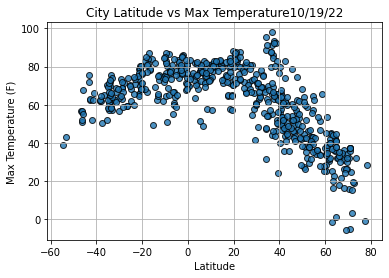

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig1.png")

# Show plot.
plt.show()

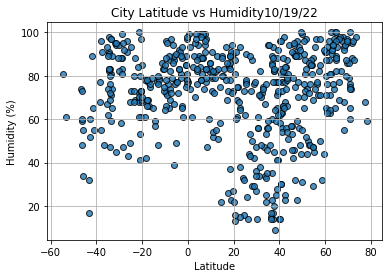

In [19]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats, humidity, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig2.png")

# Show plot.
plt.show()

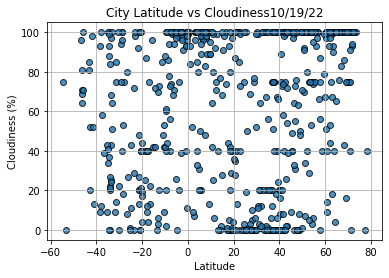

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig3.png")

# Show plot.
plt.show()

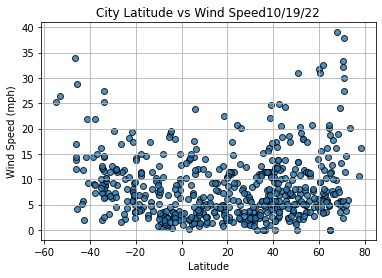

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
     # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-10-19 23:31:28
Lat                       71.2906
Lng                     -156.7887
Max Temp                    24.82
Humidity                       74
Cloudiness                      0
Wind Speed                   11.5
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2022-10-19 23:31:21,40.2833,97.2000,40.15,58,16,9.46
1,Hoi An,VN,2022-10-19 23:31:21,15.8794,108.3350,73.36,83,98,7.70
2,Klaksvik,FO,2022-10-19 23:31:22,62.2266,-6.5890,41.92,71,44,11.86
5,Ayni,TJ,2022-10-19 23:31:24,39.3941,68.5377,24.53,72,24,7.67
6,Aklavik,CA,2022-10-19 23:31:25,68.2191,-135.0107,26.60,93,100,8.05


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

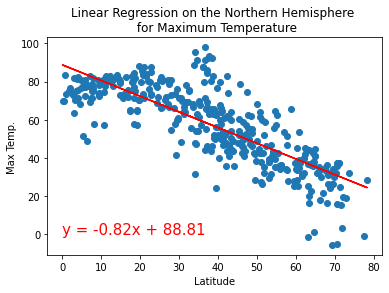

-0.8007917065046142


In [65]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp.', (0,0))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

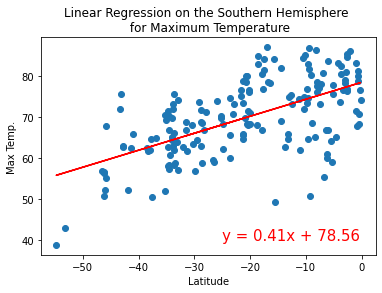

0.6029089816665394


In [73]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                      'Max Temp.', (-25, 40))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

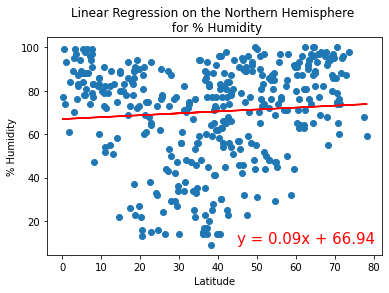

0.07689879905913377


In [74]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity', (45,10))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

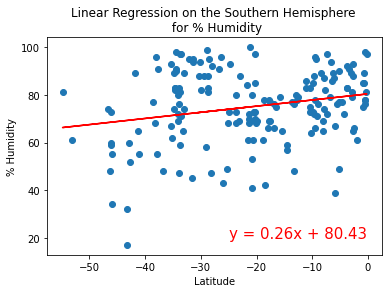

0.2305749660588254


In [75]:
# Linear regression on the Souther Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity', (-25,20))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

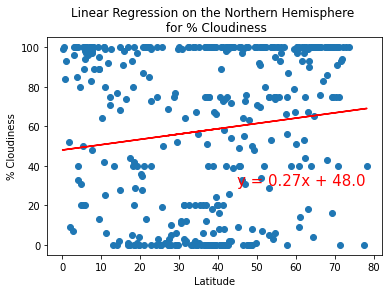

0.1330016695450305


In [76]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (45,30))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

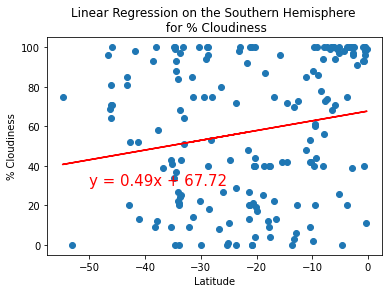

0.18942557816374433


In [77]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (-50,30))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

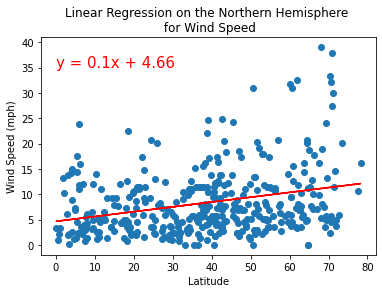

0.28714521040819213


In [79]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (0,35))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)

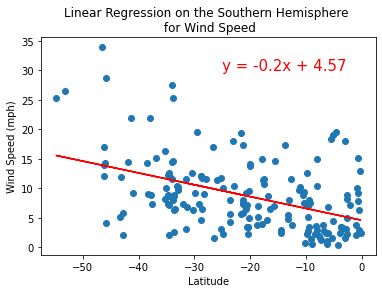

-0.44688403154590867


In [82]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (-25,30))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(r_value)